In [152]:
# Import all relevant libraries

import math, time, random
from math import ceil
import matplotlib.pyplot as plt
import numpy as np
import random
import string

<span style='background-color:#A2D9CE;padding: 15px 80px 15px 80px;line-height:80px;color:black;font-weight: bold; border-radius: 2.5px'><font size="4">Part 1</font></span>

In [153]:
class Activity:
    """
    Activity class with instance attributes for start name, duration and profit value
    """
    def __init__(self, name, duration, profit):
        self.name = name
        self.duration = duration
        self.profit = profit
        
    
    def get(self):
        '''
        Function to return all Activity attributes as a row
        '''
        return [self.name, self.duration, self.profit]

In [154]:
def maximizeProfit(activities, time_constraint):
    """
    This function is an object-oriented version of the Knapsack 1-0 algorithm 
    where the weight constraint is now a time constraint i.e. number of hours available.
    The advantage of using the Activity class here is that the function can ouput 
    not just the maximized profit, but the tasks involved and the total duration, too.
    
    Input:
        activities: an array containing Activity class objects
    Output:
        
    Note: print statements have been commented out – these are highly useful for mentally
    visualizing the table as it gets built
    """
    
    n = len(activities)
    
    # Initialize empty Activities
    placeholder = Activity('Start', 0, 0)
    
    K = [[placeholder for w in range(time_constraint + 1)] 
                      for i in range(n + 1)] 
              
    # Build table K[][]
    # Every column w in K[i][w] is a duration step e.g. 0, 1, 2 ... time_constraint
    # which is why the range is until n+1 (account for zero time step)
    
    for i in range(n + 1): 
        for w in range(time_constraint + 1):
            
            # print('Current time (column):', w)
            
            # Initialize all i[0] and w[0] to be filled with zero placeholder
            # (no activity can be executed at time 0)
            
            if i == 0 or w == 0: 
                K[i][w] = K[i][w]
                # print('Row {} column {} filled with zero placeholder'.format(i, w), '\n')
            
            # If activity i's duration is smaller than the current duration step w
            elif activities[i - 1].duration <= w: 
                # Select the max profit between 
                #     doing current activity together with a previous compatible activity
                #     or doing current activity alone
                
                current = activities[i - 1]
                compatible = K[i - 1][w - activities[i - 1].duration]
                together = Activity('{} <-- {}'.format(current.name, compatible.name), current.duration + compatible.duration, current.profit + compatible.profit)
                
                # print('Select the set which yields maximum profit: a) {} vs b) {}'.format(together.get(), K[i - 1][w].get()))
                
                if together.profit >= K[i - 1][w].profit:
                    K[i][w] = together
                    # print('Choice for column {}: a) {}'.format(w, K[i][w].get()), '\n')
                elif together.profit < K[i - 1][w].profit:
                    K[i][w] = K[i - 1][w]
                    # print('Choice for column {}: b) {}'.format(w, K[i][w].get()), '\n')
            
            # If activity i's duration is larger than the current duration step w, it can't be completed
            else: 
                K[i][w] = K[i - 1][w]
                # print('Not enough time to complete Actitivy {}, execute {} instead'.format(activities[i - 1].name, K[i - 1][w].name), '\n')
    
        # print('–\n>>> Now checking activity {} across row {}'.format(activities[i].name, i))
            
  
    # Store the result
    optimized = K[n][time_constraint] 
    
    return optimized.get()

In [155]:
# Driver code for tests
T = 5

test_1 = [Activity('Zero', 2, 10), Activity('One', 2, 20), Activity('Two', 2, 10), Activity('Three', 2, 15)] 
print(maximizeProfit(test_1, T), '\n')

test_2 = [Activity('Zero', 1, 50), Activity('One', 2, 20), Activity('Two', 13, 100), Activity('Three', 98, 200)] 
print(maximizeProfit(test_2, T), '\n')

# test_3 is the equivalent of Fig. 1 in the PDF report
test_3 = [Activity('Zero', 6, 50), Activity('One', 3, 75), Activity('Two', 2, 5), Activity('Three', 5, 65), 
          Activity('Four', 3, 35), Activity('Five', 4, 50), Activity('Six', 4, 80), Activity('Seven', 3, 40)]
print(maximizeProfit(test_3, T), '\n')

['Three <-- One <-- Start', 4, 35] 

['One <-- Zero <-- Start', 3, 70] 

['Six <-- Start', 4, 80] 



<span style='background-color:#A2D9CE;padding: 15px 80px 15px 80px;line-height:80px;color:black;font-weight: bold; border-radius: 2.5px'><font size="4">Part 2</font></span>

The task scheduler from the LBA can be found in the zipped file containing all Python notebooks. The function  `scheduleTasks` is a new task scheduler that appropriately implements the max heap queue and includes a multitasking function.

In [156]:
# List activities and their tasks

morning_routine = [[0, 'Turn phone off airplane mode', 1, False, [], 'NOT-YET-STARTED'], 
 [1, 'Duolingo French', 10, False, [0], 'NOT-YET-STARTED' ], 
 [2, 'Check WhatsApp messages', 10, False, [0], 'NOT-YET-STARTED'], 
 [3, 'Sunrise yoga routine', 10, True, [], 'NOT-YET-STARTED'], 
 [4, 'Qi Gong practice', 5, True, [], 'NOT-YET-STARTED'],
 [5, 'Box-breathing techniques', 5, True, [], 'NOT-YET-STARTED'],
 [6, 'Oil-pulling', 20, True, [3, 4, 5], 'NOT-YET-STARTED']]


remote_work = [[7, 'Content team meeting', 60, False, [], 'NOT-YET-STARTED'], 
 [8, 'Check and sort emails', 20, False, [], 'NOT-YET-STARTED' ], 
 [9, 'Research content for blog article', 60, True, [7], 'NOT-YET-STARTED'], 
 [10, 'Draft new article', 30, True, [9], 'NOT-YET-STARTED'], 
 [11, 'Edit article', 20, False, [10], 'NOT-YET-STARTED'], 
 [12, 'Publish article', 10, True, [11], 'NOT-YET-STARTED']]


cs_practice = [[13, 'DataCamp exercises', 60, False, [], 'NOT-YET-STARTED'], 
 [14, 'CS pre-class readings', 90, True, [], 'NOT-YET-STARTED' ], 
 [15, 'CS pre-class work', 90, True, [], 'NOT-YET-STARTED'], 
 [16, 'Read upcoming assignment instructions', 10, True, [14, 15], 'NOT-YET-STARTED'], 
 [17, 'Brainstorm assignment strategy', 10, True, [16], 'NOT-YET-STARTED']]


personal_writing = [[18, 'Brainstorm topic idea', 15, True, [], 'NOT-YET-STARTED'], 
 [19, 'Draft article', 60, True, [18], 'NOT-YET-STARTED' ], 
 [20, 'Research article content', 30, True, [18], 'NOT-YET-STARTED'], 
 [21, 'Edit article', 20, True, [19], 'NOT-YET-STARTED'], 
 [22, 'Send article for external editing', 5, False, [21], 'NOT-YET-STARTED']]


work_study = [[23, 'Check to-do list', 5, True, [], 'NOT-YET-STARTED'], 
 [24, 'RA internal team meeting', 30, False, [], 'NOT-YET-STARTED' ], 
 [25, 'RA full team meeting', 60, False, [24], 'NOT-YET-STARTED'], 
 [26, 'Draft event proposal', 30, True, [25], 'NOT-YET-STARTED'], 
 [27, 'Event marketing', 20, True, [24], 'NOT-YET-STARTED']]


capstone_research = [[28, 'Research potential partners', 60, True, [], 'NOT-YET-STARTED'], 
 [29, 'Send relevant emails', 30, True, [], 'NOT-YET-STARTED' ], 
 [30, 'Research token bonding curves and curation markets', 90, True, [], 'NOT-YET-STARTED'], 
 [31, 'Take notes', 30, True, [], 'NOT-YET-STARTED']]


activities = [morning_routine, remote_work, cs_practice, personal_writing, work_study, capstone_research]

In [157]:
# Define basic binary tree functions

def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2  #            returns the array index of its parent

In [158]:
def scheduleTasks(data):
    
    """
    Input: Actvity array containing tasks 
    Output: Final schedule
    Note: Print statements have been commented out
    
    """
    
    def load_data(data):
        for entry in data:
            dependencies = entry[4]
            duration = entry[2]
            # Calculate task priority based on number of dependencies and duration (negatively correlated)
            priority = 0 - (len(dependencies))*100 + 10/duration
            entry.append(priority)
            queue.append(entry)
        
    
    def heapify(i):
        """
        Max-heapify function that takes the array index of the root node of the subtree 
        """

        l = left(i)
        r = right(i)

        # Check whether the children's priority is bigger than the parent's
        if l <= len(queue) - 1 and queue[l][6] > queue[i][6]:
            largest = l
        else:
            largest = i
        if r <= len(queue) - 1 and queue[r][6] > queue[largest][6]:
            largest = r
        # If the parent does not have the highest priority, swap it with its largest priority child
        if largest != i:
            queue[i], queue[largest] = queue[largest], queue[i]
            heapify(largest)

    
    def complete_alone(single_task):
        global timer
        
        single_task[5] = 'COMPLETE'
        # print('{} is now complete: {}'. format(single_task[0], single_task[1]))
        
        # Append new columns to the task;
        #     start time is however much time has elapsed on the timer
        #     end time is start time + duration of task
        
        duration = single_task[2]
        # print('Duration:', duration)
        
        single_task.append(timer)
        single_task.append(timer + duration)
        timer += duration
        
        queue.remove(single_task)
        final_schedule.append(single_task)

        if len(queue) > 1:
            for other_tasks in queue:
                dependencies = other_tasks[4]
                if single_task[0] in dependencies:
                    dependencies.remove(single_task[0])
                    # Update priority of other tasks according to the formula:
                    other_tasks[6] += 100 

        #print('New queue order:', queue, '\n')


    def complete_together(many_tasks):
        global timer
        
        # If the tasks are being done "simultaneously", the total duration will be 
        # the duration of whichever task takes the longest
        
        duration = sum([task[2] for task in many_tasks])
        end_time_for_all = timer + duration
        # print('Duration:', duration)
        
        for task in many_tasks:
            task[5] = 'COMPLETE'
            # print('{} is now complete: {}'. format(task[0], task[1]))
            
            # Start time of all tasks is current reading on timer (executed simultaneously)
            task.append(timer)
            task.append(end_time_for_all)
            
            queue.remove(task)
            final_schedule.append(task)

            for other_tasks in queue:
                dependencies = other_tasks[4]
                if task[0] in dependencies:
                    dependencies.remove(task[0])
                    # Update priority according to the formula:
                    other_tasks[6] += 100

        timer += duration
        multitasking_queue.clear()

        #print('New queue order:', queue, '\n')

        
    def multitask_ify(task):
        idx = queue.index(task)
        multitasking_queue.append(task)

        lft = left(idx)
        rght = right(idx)

        if lft < len(queue):
            # If the left child can be multitasked and has no dependencies:
            if queue[lft][3] == True and len(queue[lft][1]) == 0:
                # print('Add left child to multitasking queue', queue[left(idx)])
                multitasking_queue.append(queue[lft])

        if rght < len(queue):
            # If the right child can be multitasked and has no dependencies:
            if queue[rght][3] == True and len(queue[rght][1]) == 0:
                # print('Add right child to multitasking queue', queue[right(idx)])
                multitasking_queue.append(queue[rght])

        # if len(multitasking_queue) > 1:
            # print('Tasks that will be executed simultaneously:', [task[0] for task in multitasking_queue])

        complete_together(multitasking_queue)
    
    
    def execute(task, queue):
        
        idx = queue.index(task)
        lft = left(idx)
        rght = right(idx)
        
        if len(queue) == 1:
            complete_alone(task)
            
        else:
            # Check that it has children to heapify
            if lft < len(queue) or rght < len(queue):
                heapify(queue.index(task))
                current = queue[0]
            else:
                current = task

            # If task has dependencies that need to be completed first:
            dependencies = current[4]
            if len(dependencies) > 0:
                first = dependencies[0]
                # print('Wait! First do {} before completing {}.'. format(first, current[0]))
                # Possibly more efficient to use a has table to extract in O(1) time
                for task in queue:
                    if task[0] == first:
                        do_instead = task

                execute(do_instead, queue)

            multitask = current[3]
            
            if multitask == True:
                multitask_ify(current)
            else:
                complete_alone(current)

    queue = []
    multitasking_queue = []
    final_schedule = []
    
    load_data(data)
    
    while len(queue) > 1:
        execute(queue[0], queue)
    if len(queue) == 1:
        complete_alone(queue[0])
    
    # print('\n Final optimized task schedule:')
    return final_schedule

<span style='background-color:#A2D9CE;padding: 15px 80px 15px 80px;line-height:80px;color:black;font-weight: bold; border-radius: 2.5px'><font size="4">Part 3</font></span>

#### Putting it all together:

In [159]:
# Initialize time elapsed to 0
timer = 0
# Time constraint (minutes)
# T = 300

def optimizeSchedule(activities, timer, T):
    
    sorted_activities = []
    
    for act in activities:
        sorted_act = scheduleTasks(act)
        sorted_activities.append(sorted_act)
        
    # print(sorted_activities)
    
    # Convert each set of tasks into a single activity
    #     duration = finish time - start time
    act_morning_routine = Activity('Morning routine', sorted_activities[0][-1][8] - sorted_activities[0][0][7], 0)
    act_remote_work = Activity('Remote work', sorted_activities[1][-1][8] - sorted_activities[1][0][7], 50)
    act_cs_practice = Activity('CS practice', sorted_activities[2][-1][8] - sorted_activities[2][0][7], 100)
    act_personal_writing = Activity('Personal writing', sorted_activities[3][-1][8] - sorted_activities[3][0][7], 30)
    act_work_study = Activity('Work study', sorted_activities[4][-1][8] - sorted_activities[4][0][7], 33.75)
    act_capstone_research = Activity('Capstone research', sorted_activities[5][-1][8] - sorted_activities[5][0][7], 25)
    
    # Load these into an array to feed into optimizeSchedule
    optimize_these = [act_morning_routine, act_remote_work, act_personal_writing, act_work_study, act_capstone_research]
    
    return maximizeProfit(optimize_these, T)

In [160]:
# Test

results = optimizeSchedule(activities, timer, 300)
print('Complete these activities: {}'.format(results[0]))
print('Total duration: {} minutes'.format(results[1]))
print('Maximized profit: ${}'.format(results[2]))

Complete these activities: Work study <-- Personal writing <-- Start
Total duration: 275 minutes
Maximized profit: $63.75


### Complexity tests

In [163]:
def randomActivityGenerator(n):
    """
    Function to generate an array of n random Activities
    """
    # A will contain n subarrays of activities which each have k subtasks
    A = []
    
    # Let there be at least two activities to compare in every subarray
    for i in range(2, n):
        random_name = '{}'.format(random.randint(1, n))
        random_duration = random.randint(1, 100)
        random_profit = random.randint(1, 100)
        act = Activity(random_name, random_duration, random_profit)
        
        # Check whether an integer name has been repeated
        check = False
        for a in A:
            if act.name == a.name:
                check = True
                # There can be no duplicate names
                
                break
                
        if check == False:
            A.append(act)
    
    return A

In [174]:
def testComplexity(n):
    # Generate lists of incrementing number of activities

    # Activity durations will never be more than 100, so let T = 500
    T = 500
    
    # Intialize empty array to store Activity subarrays of various incrementing lengths
    A = []
    
    times = []
    
    for i in range(2, n + 1, 1):
        subarray_of_activities = randomActivityGenerator(i)
        A.append(subarray_of_activities)
    
    for i in A:
        #i = [activity.get() for activity in i]
        dummy_timer = 0
        start = time.time()
        maximizeProfit(i, T)
        #optimizeSchedule(i, dummy_timer, T)
        end = time.time()
        time_difference = end - start
        times.append(time_difference)
    
    return times

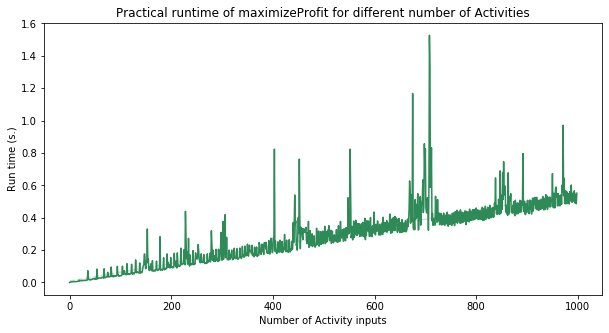

In [200]:
n = 1000
test_times = testComplexity(n)
x = [i for i in range(n-1)]

slope, intercept = np.polyfit(x, test_times, 1)

# Create a list of values in the best fit line
abline = [slope * i + intercept for i in x]

plt.figure(figsize=(10, 5))
plt.plot(test_times, color='seagreen')
plt.plot(x, abline, '--', color='seagreen', alpha=0.25)
plt.title('Practical runtime of maximizeProfit for different number of Activities')
plt.xlabel('Number of Activity inputs')
plt.ylabel('Run time (s.)')
plt.show()

### Appendix A

Below is the original weighted activity scheduler I had for Part 1. This algorithm has a time complexity of $O(n log n)$ which is better than the time complexity for the Knapsack variation above, $O(n T)$.

In [25]:
# Dynamic Programming and Binary Search solution for weighted job scheduling (Python 3)
 
class Activity:
    """
    Activity class with instance attributes for start time, finish time and profit value
    """
    def __init__(self, name, start, finish, profit):
        self.name = name
        self.start = start 
        self.finish = finish 
        self.profit = profit 
        self.duration = finish - start
    
    def get_attributes(self):
        '''
        Function to return all Activity attributes as a row
        '''
        return [self.name, self.start, self.finish, self.profit, self.duration]

def findCompatibleActivity(A, current): 
    """
    This Binary Search function finds the most recent compatible activity to the current activity
    ("compatible" means the finish and start times don't overlap)

    Input:
      A = an array of activities defined by the Activity class
      current = the index of the the current activity being examined

    Output:
      returns -1 if all activities that start before the current activity overlap with it
      otherwise returns the index of closest compatible activity to the current one 
    """
  
    lo = 0
    hi = current - 1
  
    # Iterate through the Binary Search
    while lo <= hi: 
        mid = (lo + hi) // 2
        # If the finish time of the activity in the middle of the subarray is less 
        # than the start time of the current activity
        if A[mid].finish <= A[current].start:
            # If the finish time of the activity that comes immediately after the activity in the middle
            # is also less than the start time of the current activity
            if A[mid + 1].finish <= A[current].start: 
                # We narrow the interval of the subarray under consideration so it is 1 index closer to the right
                # of the current activity. The while loop will run until we are immediately next to it.
                lo = mid + 1
            else: 
                return mid 
        else: 
            hi = mid - 1
    # If there are no compatible activities, return -1
    return -1
        
def optimizeSchedule(A): 
    """
    This function finds the set of activities in an array that yields the maximum profit
    
    Input:
      A = an array of activities defined by the Activity class

    Output:

    """
    
    # Sort the activities according to finish time (f1 <= f2 <= .. <= fn)
    A = sorted(A, key = lambda a: a.start)
    n = len(A)
    
    # Create an empty array to store solutions to each subproblem, where the 1st element is the 1st activity
    solutions = [0 for _ in range(n)] 
    solutions[0] = A[0]
  
    # Recursively fill the entries in a bottom-up manner
    for i in range(1, n): 
        
        previousProfit = solutions[i-1].profit
        currentProfit = A[i].profit
        currentActivities = [A[i]]
        # Does this activity have a recent compatible activity?
        idx = findCompatibleActivity(A, i)                
        
        # If there is a recent compatible activity:
        if idx != -1:
            # Add the profit of that activity
            # NB: We append from "solutions" and not "A" because if the most recent compatible activity 
            # comes with its own set of compatible activities, we'll want to store those too
            
            currentProfit += solutions[idx].profit
            currentActivities.append(solutions[idx])

            # Does this set of compatible activities actually yield a greater profit than the previous solution?
            # If implementing the current activity set does maximize profit
            if currentProfit > previousProfit: 
                names = ' preceeded by '.join([activity.name for activity in currentActivities])
                do_first = currentActivities[-1]
                do_last = currentActivities[0]
                solutions[i] = Activity(names, do_first.start, do_last.finish, currentProfit)
                
            # If implementing the current activity set is no better than the previous one
            else:
                solutions[i] =  Activity(solutions[i-1].name, solutions[i-1].start, solutions[i-1].finish, solutions[i-1].profit)
              
        # If there are no compatible activities:
        else:
            if currentProfit > previousProfit:
                solutions[i] =  Activity(A[i].name, A[i].start, A[i].finish, currentProfit)
            else:
                solutions[i] =  Activity(solutions[i-1].name, solutions[i-1].start, solutions[i-1].finish, solutions[i-1].profit)
                         
    return solutions[n-1].name, solutions[n-1].profit, solutions[n-1].start, solutions[n-1].finish 

In [26]:
# Driver code for tests

test_1 = [Activity('Zero', 1, 3, 10), Activity('One', 2, 3, 20), Activity('Two', 4, 5, 10), Activity('Three', 4, 6, 15)] 
test_1_results = optimizeSchedule(test_1)
print('Test 1')
print('Maximum profit: ${}'.format(test_1_results[1]))
print('Schedule: {}'.format(test_1_results[0]))
print('Start time: {}'.format(test_1_results[2]))
print('End time: {} \n'.format(test_1_results[3]))

test_2 = [Activity('Zero', 1, 2, 50), Activity('One', 3, 5, 20), Activity('Two', 6, 19, 100), Activity('Three', 2, 100, 200)] 
test_2_results = optimizeSchedule(test_2)
print('Test 2')
print('Maximum profit: ${}'.format(test_2_results[1]))
print('Schedule: {}'.format(test_2_results[0]))
print('Start time: {}'.format(test_2_results[2]))
print('End time: {} \n'.format(test_2_results[3]))

test_3 = [Activity('Zero', 0, 6, 50), Activity('One', 1, 4, 75), Activity('Two', 3, 5, 5), Activity('Three', 3, 8, 65), 
          Activity('Four', 4, 7, 35), Activity('Five', 5, 9, 50), Activity('Six', 6, 10, 80), Activity('Seven', 8, 11, 40)]
test_3_results = optimizeSchedule(test_3)
print('Test 3')
print('Maximum profit: ${}'.format(test_3_results[1]))
print('Schedule: {}'.format(test_3_results[0]))
print('Start time: {}'.format(test_3_results[2]))
print('End time: {}'.format(test_3_results[3]))

Test 1
Maximum profit: $35
Schedule: Three preceeded by One
Start time: 2
End time: 6 

Test 2
Maximum profit: $250
Schedule: Three preceeded by Zero
Start time: 1
End time: 100 

Test 3
Maximum profit: $155
Schedule: Six preceeded by One
Start time: 1
End time: 10


In [27]:
# Compare Dynamic Programming Solution with a greedy algorithm

def greedyOptimizeSchedule(A):
    '''
    Greedy algorithm to schedule weighted activities.
    Sorting takes O(n log n), selecting takes O(n) => O(n log n) complexity
    Greedy because it tries to maximize profit by doing as many tasks as possible, 
    not by prioritizing more valuable tasks
    '''

    A = sorted(A, key = lambda a: a.start)

    O = []
    finish = 0
    for i in A:
        if finish <= i.start: # The first activity will always be selected
            finish = i.finish
            O.append(i)

    return [i.name for i in O]

In [28]:
# Driver code for greedy tests

print(greedyOptimizeSchedule(test_1))
print(greedyOptimizeSchedule(test_2))
print(greedyOptimizeSchedule(test_3))

['Zero', 'Two']
['Zero', 'Three']
['Zero', 'Six']
